In [2]:
import pandas as pd
import seaborn as sns
from glob import glob
from natsort import natsorted
import numpy as np
import tifffile 
import matplotlib.pyplot as plt

In [3]:
naive_comparison_results_1um = pd.read_pickle("naive_comparison_results_1um.pickle")
naive_comparison_results_1um["Cell Radius"] = 1
naive_comparison_results_1um["Correction"] = "None"

naive_comparison_results_1um_DoF_corrected = pd.read_pickle("naive_comparison_results_1um_DoF_corrected.pickle")
naive_comparison_results_1um_DoF_corrected["Cell Radius"] = 1
naive_comparison_results_1um_DoF_corrected["Correction"] = "Focal offset corrected"

naive_comparison_results_MACS = pd.read_pickle("naive_comparison_results_MACS.pickle")
naive_comparison_results_MACS["Cell Radius"] = 1
naive_comparison_results_MACS["Corrected"] = naive_comparison_results_MACS["Observed N molecules"]
naive_comparison_results_MACS["Correction"] = "MACS"


naive_comparison_results = pd.concat([naive_comparison_results_1um, naive_comparison_results_1um_DoF_corrected, naive_comparison_results_MACS])

In [4]:
def prediction_category(row):
    if row['Corrected'] < row['True N molecules']:
        return 'Underprediction'
    elif row['Corrected'] > row['True N molecules']:
        return 'Overprediction'
    else:
        return 'Perfect Prediction'
#naive_comparison_results['Prediction Category'] = naive_comparison_results.apply(prediction_category, axis=1)

/tmp/ipykernel_3601/4274311224.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.0")["frame"].value_counts(ascending=True).reset_index()


(0.0, 30.0)

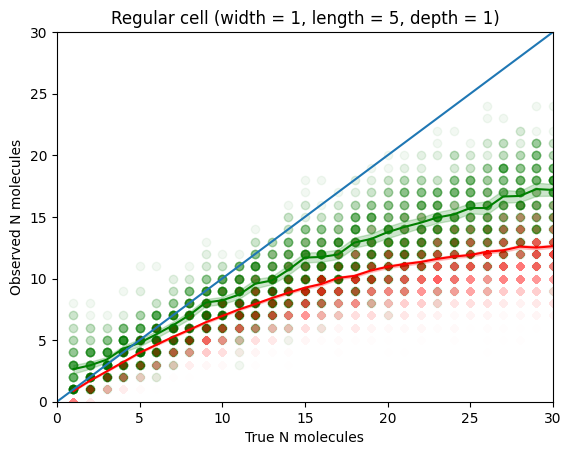

In [7]:
test_data_dirs = natsorted(glob("DEEPSTORM_test_data/*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_test_data/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    _ = pd.read_csv(f"DEEPSTORM_test_data_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
    _["frame"] = frame_ID
    predictions.append(
        _
    )

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.0")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data.columns = ["frame", "True", "Observed"]

sns.lineplot(x = naive_comparison_results_1um["True N molecules"], y = naive_comparison_results_1um["Observed N molecules"], c = "r")
sns.scatterplot(x = naive_comparison_results_1um["True N molecules"], y = naive_comparison_results_1um["Observed N molecules"], c = "r", alpha=0.003)


plt.scatter(combined_data["True"], combined_data["Observed"], alpha=0.05, c = "g")
sns.lineplot(x = combined_data["True"], y = combined_data["Observed"], c = "g")
plt.title("Regular cell (width = 1, length = 5, depth = 1)")
plt.plot([0,30], [0,30])
plt.xlim(0,30)
plt.ylim(0,30)


(0.0, 30.0)

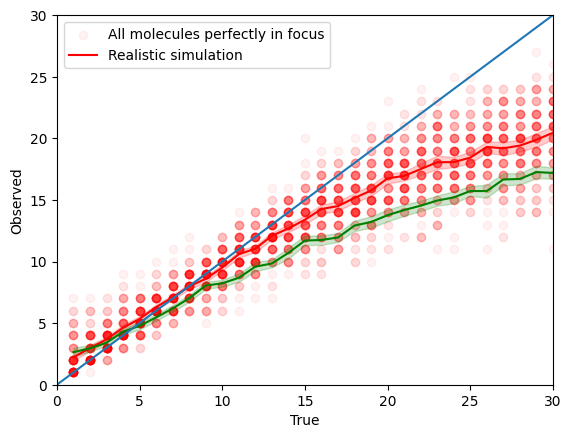

In [107]:
test_data_dirs = natsorted(glob("DEEPSTORM_test_data_no_DoF//*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_test_data_no_DoF/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    try:
        _ = pd.read_csv(f"DEEPSTORM_test_data_no_DoF_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
        _["frame"] = frame_ID
        predictions.append(
            _
        )
    except:
        pass

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data_no_DoF = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data_no_DoF.columns = ["frame", "True", "Observed"]

plt.scatter(combined_data_no_DoF["True"], combined_data_no_DoF["Observed"], alpha=0.05, c = "r")
sns.lineplot(x = combined_data_no_DoF["True"], y = combined_data_no_DoF["Observed"], c = "r")
sns.lineplot(x = combined_data["True"], y = combined_data["Observed"], c = "g")
plt.legend(["All molecules perfectly in focus", "Realistic simulation"])

plt.plot([0,30], [0,30])
plt.xlim(0,30)
plt.ylim(0,30)


(0.0, 30.0)

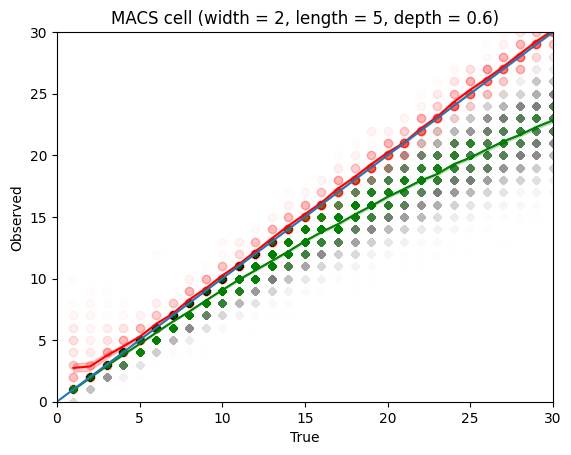

In [108]:
test_data_dirs = natsorted(glob("DEEPSTORM_MACS_test_data/*.tif"))

ground_truth_localisation = pd.read_csv("DEEPSTORM_MACS_test_data/SimulatedDataset.csv")

ground_truth_counts = pd.DataFrame(ground_truth_localisation["frame"].value_counts(ascending=True)).reset_index()
ground_truth_counts.columns = ["frame", "count"]
ground_truth_counts = ground_truth_counts.sort_values(by="frame").reset_index(drop=True)

frame_IDs = ground_truth_counts["frame"].unique()

predictions = []
for frame_ID in frame_IDs:
    _ = pd.read_csv(f"DEEPSTORM_MACS_test_data_predicted/Localizations_{str(frame_ID).zfill(4)}_test_avg.csv")
    _["frame"] = frame_ID
    predictions.append(
        _
    )

predicted_counts = pd.concat(predictions).query("`confidence [a.u]` > 0.")["frame"].value_counts(ascending=True).reset_index()
predicted_counts.columns = ["frame", "count"]
predicted_counts = predicted_counts.sort_values(by="frame").reset_index(drop=True)

combined_data_MACS = pd.merge(ground_truth_counts, predicted_counts, on="frame")
combined_data_MACS.columns = ["frame", "True", "Observed"]

plt.scatter(combined_data_MACS["True"], combined_data_MACS["Observed"], alpha=0.01, c = "r")
sns.lineplot(x = combined_data_MACS["True"], y = combined_data_MACS["Observed"], c = "r")
sns.lineplot(x = naive_comparison_results_MACS["True N molecules"], y = naive_comparison_results_MACS["Observed N molecules"], c = "g")
sns.scatterplot(x = naive_comparison_results_MACS["True N molecules"], y = naive_comparison_results_MACS["Observed N molecules"], c = "g", alpha=0.003)

plt.title("MACS cell (width = 2, length = 5, depth = 0.6)")

plt.plot([0,30], [0,30])
plt.xlim(0,30)
plt.ylim(0,30)


<Axes: xlabel='Observed', ylabel='Probability'>

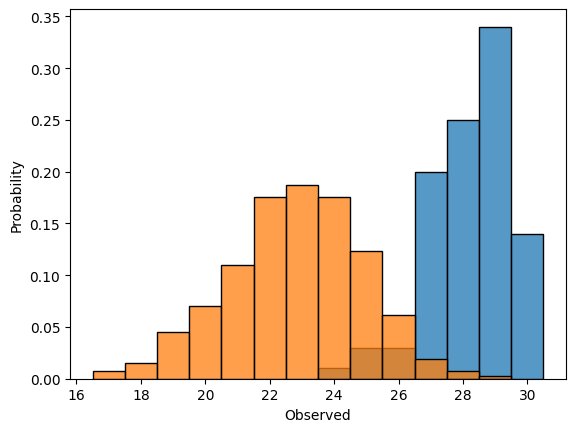

In [30]:
sns.histplot(combined_data_MACS.query("`True` == 30")["Observed"], discrete=True, stat = "probability")
sns.histplot(naive_comparison_results_MACS.query("`True N molecules` == 30")["Observed N molecules"], discrete=True, stat = "probability")